In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline  

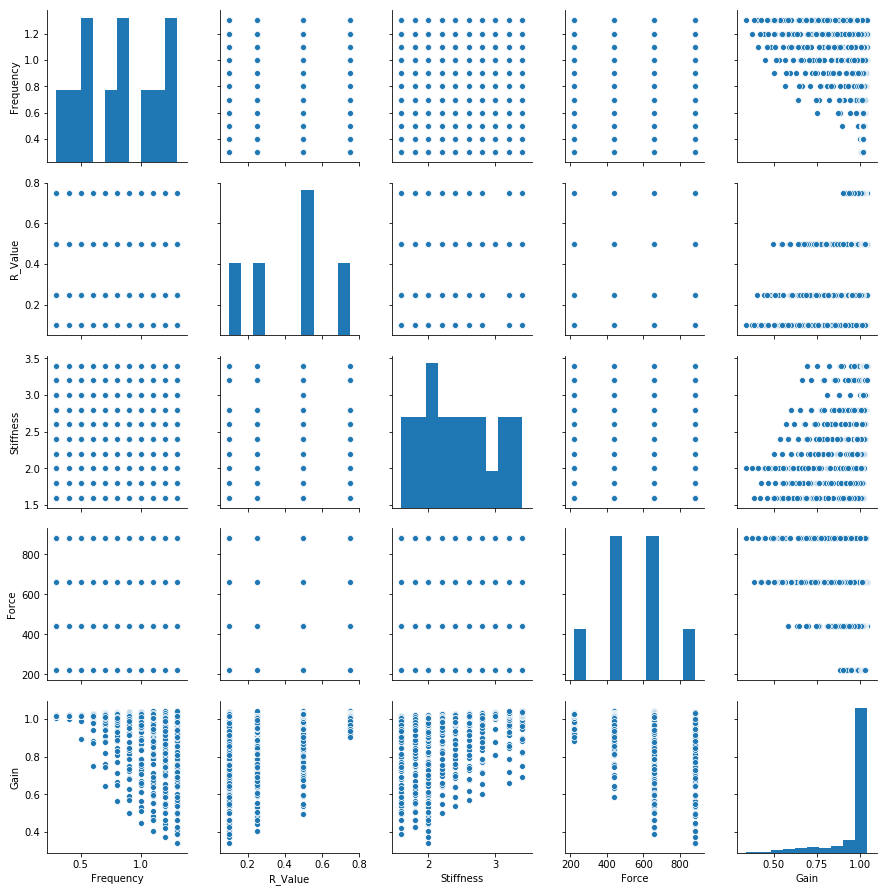

In [2]:
df=pd.read_csv(r"C:\Users\Public\MLinputs.csv" )
sns.pairplot(df)

In [3]:
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

In [4]:
X = df.drop(['Gain'],axis=1)
X = preprocessing.scale(X)
gain=df.Gain

In [5]:
gainclass=np.zeros(len(gain))

for i in range(0, len(gain)):
    if gain[i]>0.9:
        gainclass[i]=1
    else:
        gainclass[i]=0

In [6]:
gainclass2=['']*len(gain)

for i in range(0, len(gain)):
    if gain[i]>0.9:
        gainclass2[i]='pass'
    elif gain[i]>0.65:
        gainclass2[i]='meh'
    else:
        gainclass2[i]='fail'

In [7]:
gainclass3=['']*len(gain)

for i in range(0, len(gain)):
    if gain[i]>0.98:
        gainclass3[i]='above 0.98'
    elif gain[i]>0.9:
        gainclass3[i]='above 0.9'
    elif gain[i]>0.75:
        gainclass3[i]='above 0.75'
    elif gain[i]>0.5:
        gainclass3[i]='above 0.5'
    else:
        gainclass3[i]='fail'

In [8]:
gainclass4=['']*len(gain)

for i in range(0, len(gain)):
    if gain[i]>0.98:
        gainclass4[i]='above 0.98'
    elif gain[i]>0.9:
        gainclass4[i]='above 0.9'
    elif gain[i]>0.8:
        gainclass4[i]='above 0.8'
    elif gain[i]>0.7:
        gainclass4[i]='above 0.7'
    elif gain[i]>0.6:
        gainclass4[i]='above 0.6'
    elif gain[i]>0.5:
        gainclass4[i]='above 0.5'
    elif gain[i]>0.4:
        gainclass4[i]='above 0.4'
    else:
        gainclass4[i]='above 0.3'

In [45]:
Y =  pd.DataFrame(gainclass)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)

In [49]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 31   5]
 [  0 184]]


              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93        36
         1.0       0.97      1.00      0.99       184

   micro avg       0.98      0.98      0.98       220
   macro avg       0.99      0.93      0.96       220
weighted avg       0.98      0.98      0.98       220



# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions=dtree.predict(X_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [52]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 31   5]
 [  0 184]]


              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93        36
         1.0       0.97      1.00      0.99       184

   micro avg       0.98      0.98      0.98       220
   macro avg       0.99      0.93      0.96       220
weighted avg       0.98      0.98      0.98       220



# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 34   2]
 [  1 183]]


              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        36
         1.0       0.99      0.99      0.99       184

   micro avg       0.99      0.99      0.99       220
   macro avg       0.98      0.97      0.97       220
weighted avg       0.99      0.99      0.99       220



C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# from sklearn.externals import joblib 
# joblib.dump(gpr, 'Gauss Model.pkl') 